In [84]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [85]:
df = pd.read_csv('/content/gdrive/My Drive/exam.csv')

In [86]:
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


1) 데이ㅓ 파악
2)변수 이름 변경
3) 학생별로 총점과 평균 위한 파생변수
4) 반별 인원수 파악
5) 평균이 60점ㅇ ㅣ상이면 합격, 아니면 불합격 파생변수
6) 평균에 따라 등급 a b c d f 파생변수
7) 등급별 인원수를 그래프로

In [87]:
# 1) 데이터 파악하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


In [88]:
df.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [89]:
df.shape

(20, 5)

In [90]:
df.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


In [91]:
# 2) 변수 이름 변경
# df.columns = ['sno','class','math','eng','sci']
df = df.rename(columns={'english':'eng','science':'sci','nclass':'class'})

In [92]:
df.head()

,id,class,math,eng,sci
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [93]:
# 3) 학생별로 총점과 평균 위한 파생변수
df['total'] = df['math']+df['eng']+df['sci']
df['avg'] = (df['total']/3).round(2)

In [94]:
df

,id,class,math,eng,sci,total,avg
0,1,1,50,98,50,198,66.00
1,2,1,60,97,60,217,72.33
2,3,1,45,86,78,209,69.67
3,4,1,30,98,58,186,62.00
4,5,2,25,80,65,170,56.67
5,6,2,50,89,98,237,79.00
6,7,2,80,90,45,215,71.67
7,8,2,90,78,25,193,64.33
8,9,3,20,98,15,133,44.33
9,10,3,50,98,45,193,64.33


In [95]:
# 4) 반별 인원수
df.groupby('class').size()

class
1    4
2    4
3    4
4    4
5    4
dtype: int64

In [96]:
# 5) 평균 60 이상이면 합격, 아니면 불합격
import numpy as np
df['passed'] = np.where(df['avg']>=60,'PASS','FAIL')

,id,class,math,eng,sci,total,avg,passed
0,1,1,50,98,50,198,66.00,PASS
1,2,1,60,97,60,217,72.33,PASS
2,3,1,45,86,78,209,69.67,PASS
3,4,1,30,98,58,186,62.00,PASS
4,5,2,25,80,65,170,56.67,FAIL


In [97]:
# 6) 평균에 따라 등급을 나누자 ABCDF
df['grade'] = np.where(df['avg']>=90,'A',
                         np.where(df['avg']>=80,'B',
                                     np.where(df['avg']>=70,'C',
                                          np.where(df['avg']>=60,'D','F'))))

In [98]:
df

,id,class,math,eng,sci,total,avg,passed,grade
0,1,1,50,98,50,198,66.00,PASS,D
1,2,1,60,97,60,217,72.33,PASS,C
2,3,1,45,86,78,209,69.67,PASS,D
3,4,1,30,98,58,186,62.00,PASS,D
4,5,2,25,80,65,170,56.67,FAIL,F
5,6,2,50,89,98,237,79.00,PASS,C
6,7,2,80,90,45,215,71.67,PASS,C
7,8,2,90,78,25,193,64.33,PASS,D
8,9,3,20,98,15,133,44.33,FAIL,F
9,10,3,50,98,45,193,64.33,PASS,D


In [99]:
dfg = df.groupby('grade',as_index=False).agg(cnt = ('class','count'))
dfg

,grade,cnt
0,B,2
1,C,6
2,D,8
3,F,4


In [100]:
import seaborn as sns

<Axes: xlabel='grade', ylabel='cnt'>

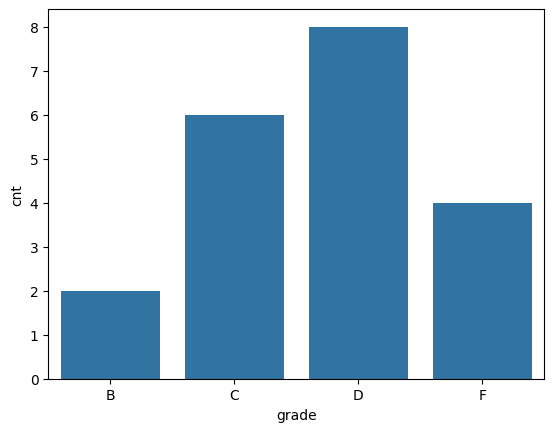

In [101]:
sns.barplot(data = dfg,x='grade', y = 'cnt')

<Axes: xlabel='grade', ylabel='count'>

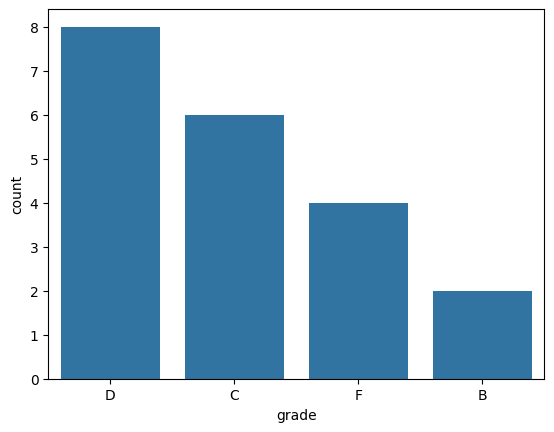

In [102]:
sns.countplot(data = df, x='grade')